In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("C:/Users/Khushal/Desktop/IIC/DA/ML/income.csv")

In [6]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

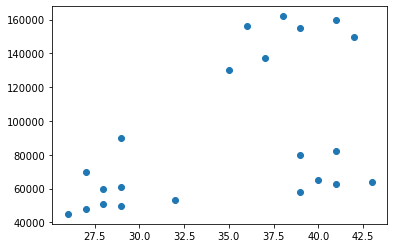

In [8]:
plt.scatter(data['Age'],data['Income($)'])

In [10]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [14]:
pred=km.fit_predict(data[['Age','Income($)']])
pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [26]:
data['cluster']=pred


In [27]:
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No handles with labels found to put in legend.


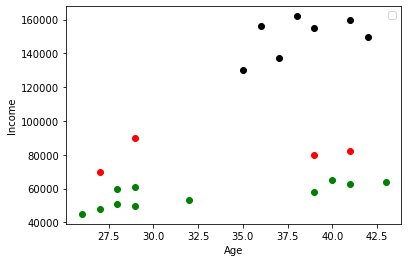

In [23]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]

plt.scatter(data1['Age'],data1['Income($)'],color='green')
plt.scatter(data2['Age'],data2['Income($)'],color='black')
plt.scatter(data3['Age'],data3['Income($)'],color='red')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [64]:
#scaling needs to be done 

scl=MinMaxScaler()
scl.fit(data[['Income($)']])


MinMaxScaler()

In [65]:
data['Income($)']=scl.transform(data[['Income($)']])
data

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,2
9,0.529412,0.726496,2


In [90]:
scl.fit(data[['Age']])
data['Age']=scl.transform(data[['Age']])
data

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


In [67]:
km.fit(data[['Age','Income($)']])
pred1=km.predict(data[['Age','Income($)']])

In [68]:
data['cluster']=pred1


In [72]:
#centeroid
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income($)')

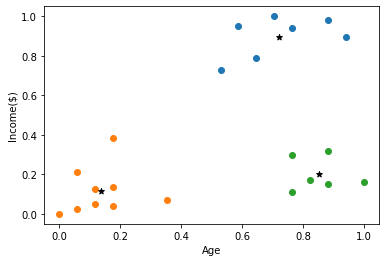

In [73]:
data0=data[data.cluster==0]
data1=data[data.cluster==1]
data2=data[data.cluster==2]

plt.scatter(data0['Age'],data0['Income($)'])
plt.scatter(data1['Age'],data1['Income($)'])
plt.scatter(data2['Age'],data2['Income($)'])

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*",color='black',label='centroid')

plt.xlabel("Age")
plt.ylabel('Income($)')

In [84]:
#using elbow method for selecting the 'K'
K_rang=range(1,10)
sse=[]

for k in  K_rang:
    km=KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Khushal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [85]:
sse

[5.434011511984241,
 2.091136388689264,
 0.4750783498520276,
 0.3491047094404182,
 0.26217927623358384,
 0.22395807059339964,
 0.18173811754963431,
 0.13706529523842573,
 0.10383752586764596]

Text(0, 0.5, 'sse')

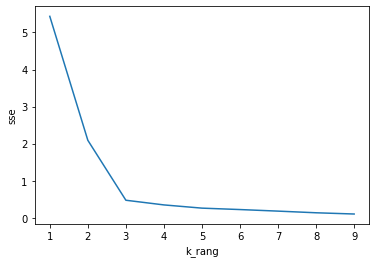

In [88]:
plt.plot(K_rang,sse)
plt.xlabel("k_rang")
plt.ylabel("sse")

In [ ]:
#hence best value for K is 3 